In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [3]:
X = pd.read_csv('/Users/prathyushachelemella/Desktop/games.csv')
X

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2022-12-22,22200477,Final,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,...,25.0,46.0,1610612759,117.0,0.478,0.815,0.321,23.0,44.0,1
1,2022-12-22,22200478,Final,1610612762,1610612764,2022,1610612762,120.0,0.488,0.952,...,16.0,40.0,1610612764,112.0,0.561,0.765,0.333,20.0,37.0,1
2,2022-12-21,22200466,Final,1610612739,1610612749,2022,1610612739,114.0,0.482,0.786,...,22.0,37.0,1610612749,106.0,0.470,0.682,0.433,20.0,46.0,1
3,2022-12-21,22200467,Final,1610612755,1610612765,2022,1610612755,113.0,0.441,0.909,...,27.0,49.0,1610612765,93.0,0.392,0.735,0.261,15.0,46.0,1
4,2022-12-21,22200468,Final,1610612737,1610612741,2022,1610612737,108.0,0.429,1.000,...,22.0,47.0,1610612741,110.0,0.500,0.773,0.292,20.0,47.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26646,2014-10-06,11400007,Final,1610612737,1610612740,2014,1610612737,93.0,0.419,0.821,...,24.0,50.0,1610612740,87.0,0.366,0.643,0.375,17.0,43.0,1
26647,2014-10-06,11400004,Final,1610612741,1610612764,2014,1610612741,81.0,0.338,0.719,...,18.0,40.0,1610612764,85.0,0.411,0.636,0.267,17.0,47.0,0
26648,2014-10-06,11400005,Final,1610612747,1610612743,2014,1610612747,98.0,0.448,0.682,...,29.0,45.0,1610612743,95.0,0.387,0.659,0.500,19.0,43.0,1
26649,2014-10-05,11400002,Final,1610612761,1610612758,2014,1610612761,99.0,0.440,0.771,...,21.0,30.0,1610612758,94.0,0.469,0.725,0.385,18.0,45.0,1


In [19]:
X.describe()

count     4.0000
mean     35.0000
std      19.5789
min      15.0000
25%      22.5000
50%      32.5000
75%      45.0000
max      60.0000
dtype: float64

In [5]:
X.duplicated().sum()

0

In [6]:
X.isnull().sum()

GAME_DATE_EST        0
GAME_ID              0
GAME_STATUS_TEXT     0
HOME_TEAM_ID         0
VISITOR_TEAM_ID      0
SEASON               0
TEAM_ID_home         0
PTS_home            99
FG_PCT_home         99
FT_PCT_home         99
FG3_PCT_home        99
AST_home            99
REB_home            99
TEAM_ID_away         0
PTS_away            99
FG_PCT_away         99
FT_PCT_away         99
FG3_PCT_away        99
AST_away            99
REB_away            99
HOME_TEAM_WINS       0
dtype: int64

In [7]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
df = pd.DataFrame({'A': [1, 2, pd.np.nan], 'B': [4, pd.np.nan, pd.np.nan], 'C': [7, 8, 9]})

df.fillna(0, inplace=True)

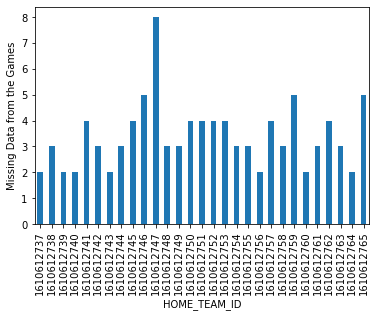

In [9]:
df_home_team = X[X.isna().any(axis=1)].groupby(['HOME_TEAM_ID'])['HOME_TEAM_ID'].count()
ax = df_home_team.plot.bar(x='HOME_TEAM_ID', y='count', rot=90, ylabel="Missing Data from the Games")

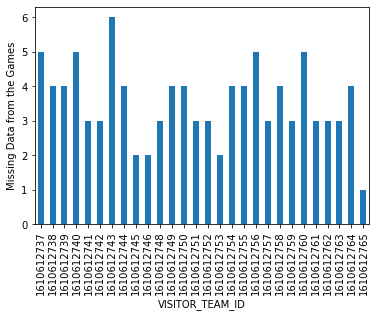

In [10]:
df_visitor_team = X[X.isna().any(axis=1)].groupby(['VISITOR_TEAM_ID'])['VISITOR_TEAM_ID'].count()
ax = df_visitor_team.plot.bar(x='VISITOR_TEAM_ID', y='count', rot=90, ylabel="Missing Data from the Games")

<AxesSubplot:ylabel='Missing Data'>

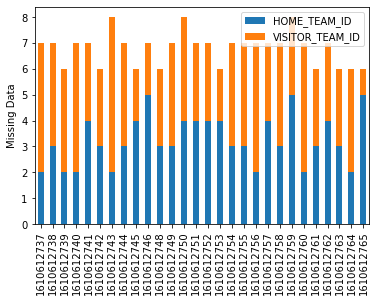

In [11]:
df = pd.merge(df_home_team, df_visitor_team, right_index = True, left_index = True)
df.plot.bar(stacked = True, ylabel="Missing Data")

In [13]:
X = pd.read_csv('/Users/prathyushachelemella/Desktop/games.csv')

columns_to_drop = ['GAME_DATE_EST', 'GAME_STATUS_TEXT', 'TEAM_ID_home', 'FG_PCT_home', 'FT_PCT_home', 
                   'FG3_PCT_home', 'TEAM_ID_away','FG_PCT_away', 'FT_PCT_away','FG3_PCT_away']

X = X.drop(columns_to_drop, axis=1)


In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26651 entries, 0 to 26650
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GAME_ID          26651 non-null  int64  
 1   HOME_TEAM_ID     26651 non-null  int64  
 2   VISITOR_TEAM_ID  26651 non-null  int64  
 3   SEASON           26651 non-null  int64  
 4   PTS_home         26552 non-null  float64
 5   AST_home         26552 non-null  float64
 6   REB_home         26552 non-null  float64
 7   PTS_away         26552 non-null  float64
 8   AST_away         26552 non-null  float64
 9   REB_away         26552 non-null  float64
 10  HOME_TEAM_WINS   26651 non-null  int64  
dtypes: float64(6), int64(5)
memory usage: 2.2 MB


In [15]:
df = X.drop(columns=['GAME_ID', 'HOME_TEAM_WINS'])

Y = df.corrwith(X['SEASON'], method = 'spearman').sort_values(ascending=False)

print(Y)

SEASON             1.000000
PTS_away           0.391898
PTS_home           0.361211
AST_away           0.264997
AST_home           0.205132
REB_away           0.191785
REB_home           0.157285
VISITOR_TEAM_ID    0.000794
HOME_TEAM_ID      -0.001463
dtype: float64


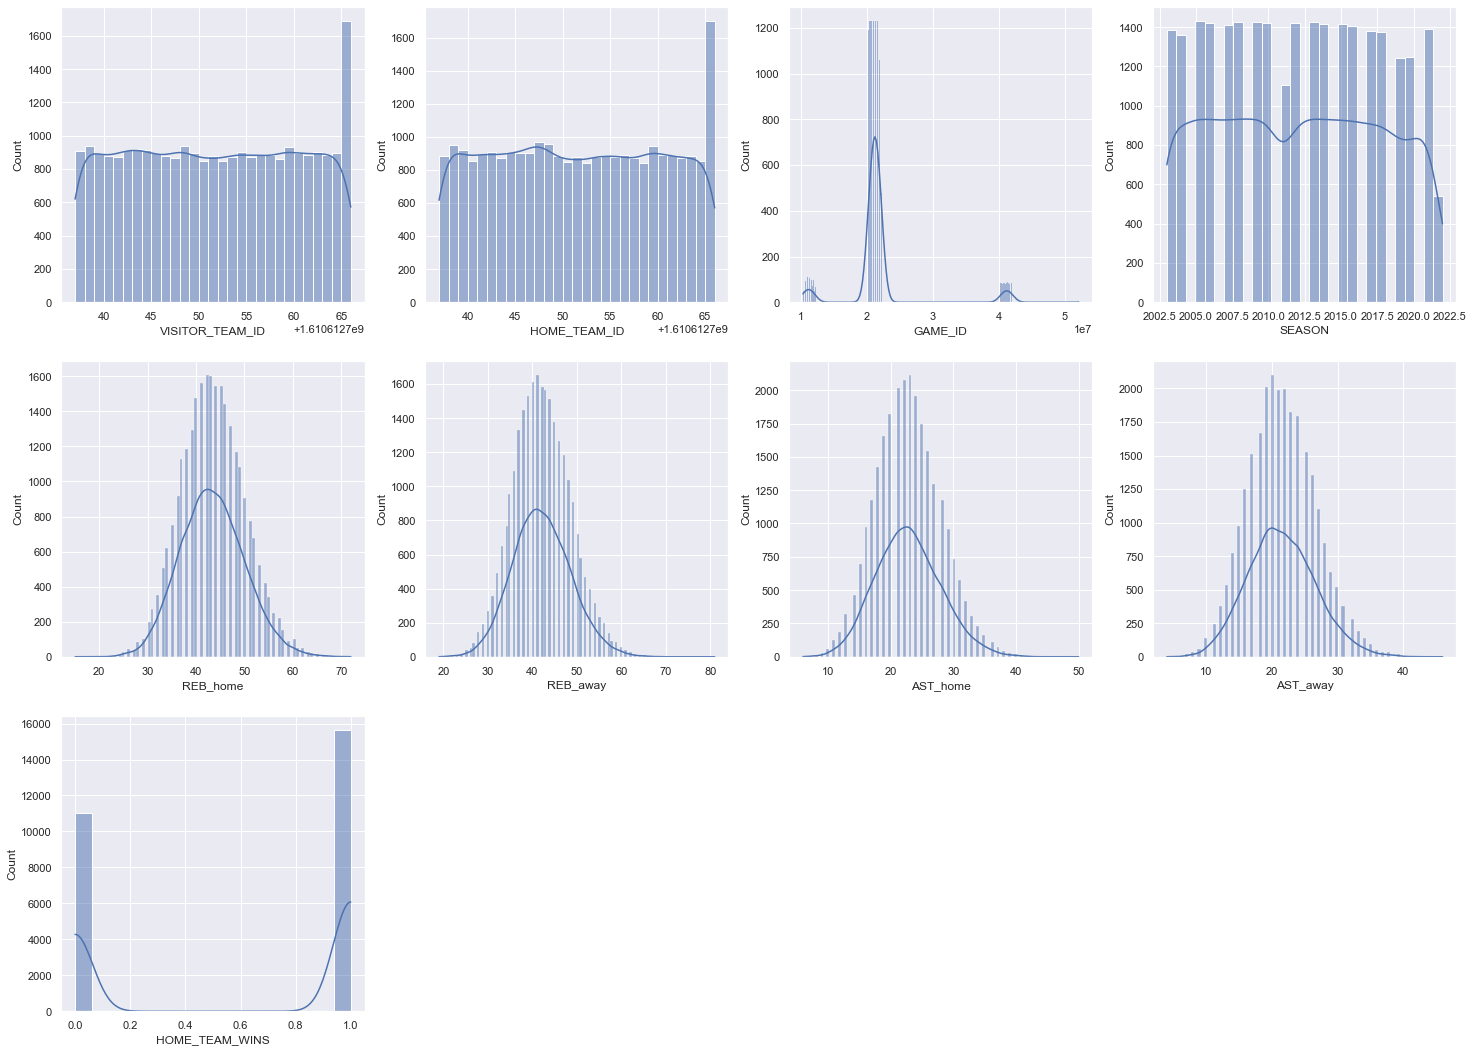

In [16]:
value_list = ['VISITOR_TEAM_ID', 'HOME_TEAM_ID', 'GAME_ID', 'SEASON', 
              'REB_home', 'REB_away',
              'AST_home', 'AST_away', 
              'HOME_TEAM_WINS',
             ]

sns.set(rc={'figure.figsize':(25,25)})
for i, column in enumerate(value_list, 1):
    plt.subplot(4,4,i)
    p=sns.histplot(x=column, data=X, stat='count', kde=True)

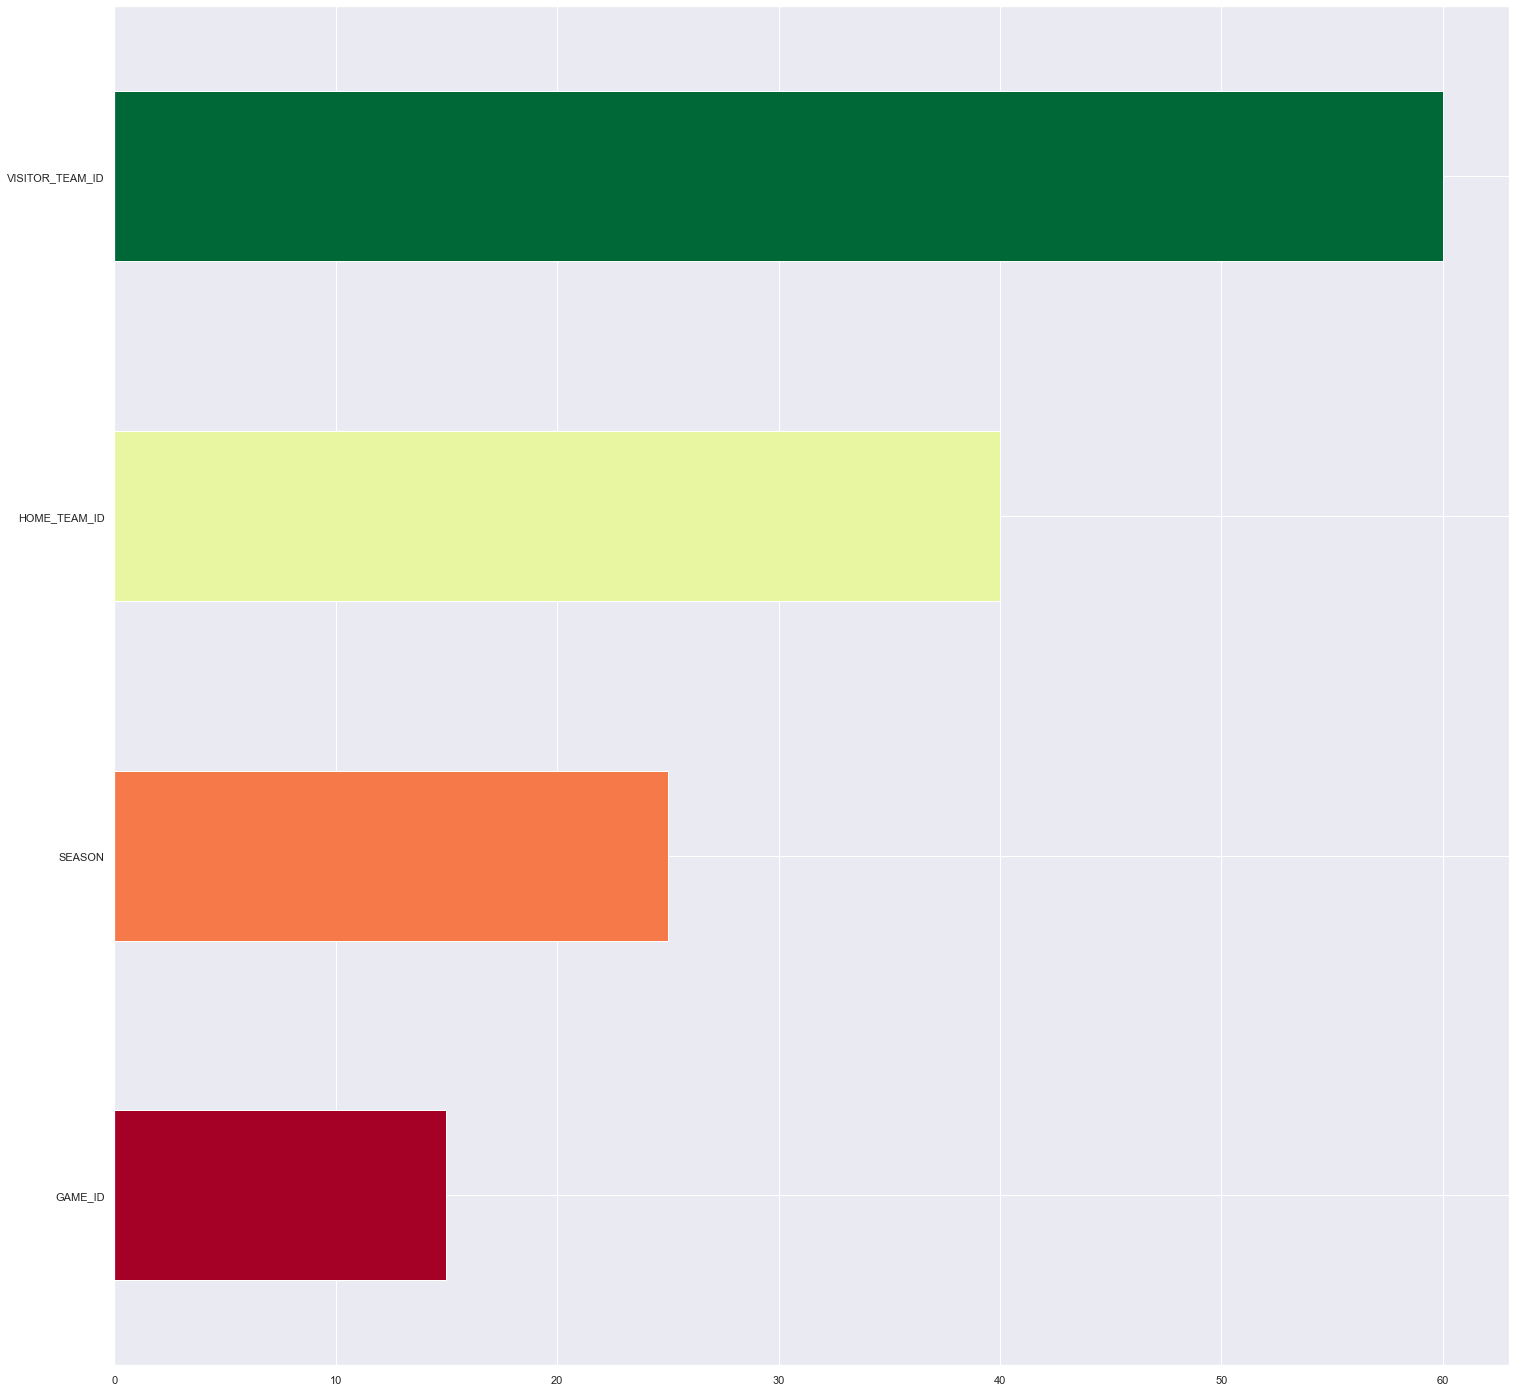

In [17]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd

# create a sample dataframe
data = {'GAME_ID': 15, 'SEASON': 25, 'HOME_TEAM_ID': 40, 'VISITOR_TEAM_ID': 60}
X = pd.Series(data)

# normalize the data
norm = mcolors.Normalize(vmin=X.min(), vmax=X.max())

# create a list of colors mapped to the data values
colors = [plt.cm.RdYlGn(norm(c)) for c in X.values]

# plot the horizontal bar chart with the mapped colors
X.plot.barh(color=colors)
plt.show()

